In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyinflect

     |████████████████████████████████| 706kB 5.9MB/s 


In [ ]:
import nltk 
from nltk.corpus import wordnet 
import requests 
from bs4 import BeautifulSoup 
import re
from pyinflect import getAllInflections, getInflection

In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
q=[]
a=[]

In [ ]:
def get_prettify(URL):
  r = requests.get(URL)   
  soup = BeautifulSoup(r.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib 
  return soup

In [ ]:
t=soup.find('h1')
t=str(t)
q.append(t[4:-5])

In [ ]:

t=soup.findAll('p')
t=str(t[3])
a.append(t[3:-4])

In [ ]:
a

['Depression (major depressive disorder) is a common and serious medical illness that negatively affects how you feel, the way you think and how you act. Fortunately, it is also treatable. Depression causes feelings of sadness and/or a loss of interest in activities you once enjoyed. It can lead to a variety of emotional and physical problems and can decrease your ability to function at work and at home.']

In [ ]:
q

['What Is Depression?']

In [ ]:
soup=get_prettify("https://www.everydayhealth.com/hs/major-depression-health-well-being/surprising-depression-facts/")

In [ ]:
soup = BeautifulSoup(soup)
print(soup)

In [ ]:
facts=[]
f=soup.findAll('strong')
clean=re.compile('<.*?>')
for i in range(4,len(f)-1):
  f[i]=re.sub(clean,'',str(f[i]))
  facts.append(f[i].strip())
del facts[4]
del facts[6]
facts

In [ ]:
#create ques for facts about depression
"""q.append("Can you tell me some facts about depressions?")
q.append("Tell me few facts about depressions?")
q.append("Unknown facts about depression!")
q.append("Facts about depression")"""

In [ ]:

getAllInflections('want')

{'NN': ('want',),
 'NNS': ('wants',),
 'VB': ('want',),
 'VBD': ('wanted',),
 'VBG': ('wanting',),
 'VBN': ('wanted',),
 'VBP': ('want',),
 'VBZ': ('wants',)}

In [ ]:
#get words similar to sad for the next questions
synonyms =set()  
for syn in wordnet.synsets("sad"): 
    for l in syn.lemmas(): 
        synonyms.add(l.name()) 
print(synonyms)

{'lamentable', 'pitiful', 'distressing', 'deplorable', 'sad', 'sorry'}


In [ ]:
#lets append the question with these words
for i in synonyms:
  q.append('I am '+i)

In [ ]:
q

['I am lamentable',
 'I am pitiful',
 'I am distressing',
 'I am deplorable',
 'I am sad',
 'I am sorry']

In [ ]:
#for these questions we will answer by sending postive messages and quotes so that they feel good about themselves
soup = get_prettify('https://www.luvze.com/cheer-up-quotes/')
print(soup)

<!DOCTYPE html>
<html lang="en-US"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>125 Cheer Up Quotes and Sayings</title>

<!-- This site is optimized with the Yoast SEO plugin v13.0 - https://yoast.com/wordpress/plugins/seo/ -->
<meta content="Are you looking for the best cheer up quotes? Look no further. Here we have listed 125 inspirational quotes to cheer someone up." name="description"/>
<meta content="max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
<link href="https://www.luvze.com/cheer-up-quotes/" rel="canonical"/>
<meta content="en_US" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="125 Cheer Up Quotes and Sayings" property="og:title"/>
<meta content="Are you looking for the best cheer up quotes? Look no further. Here we have listed 125 inspirational quotes to cheer someone up." property="og:description"/>
<meta content="https://www.luvze.com/cheer-up-

In [ ]:
quotes=list()

for p in soup.findAll('p'):
  if p.a or p.span or p.img:
    continue
  quotes.append(p)

quotes[6:17:2]

[<p>2. You are awesome! Never forget that.</p>,
 <p>3. Forget what’s gone, appreciate what remains, and look forward what’s coming next.</p>,
 <p>4. Remember that sometimes, not getting what you want is a wonderful stroke of luck. – Dalai Lama</p>,
 <p>5. Being happy doesn’t mean that everything is perfect. It simply means that you’ve decided to look beyond the imperfections of life.</p>,
 <p>6. The people who are always trying to cheer others up are unhappy themselves.</p>,
 <p>7. Always remember, you are braver than you believe. Stronger than you seem. Smarter than you think. And twice as beautiful as you’d ever imagined.</p>]

In [ ]:
clean=re.compile('<.*?>')
for i in quotes[6:17:2]:
  i=re.sub(clean,'',str(i))
  i=i.strip()
  a.append("Hey,hang in there.I know time's is tough but be patient and everything will fall into place.Here is a quote that I found which could cheer you up!: "+i[2:].strip())

In [ ]:
q

['I am lamentable',
 'I am pitiful',
 'I am distressing',
 'I am deplorable',
 'I am sad',
 'I am sorry']

In [ ]:
a 

['Hey,hang in there.I know time is tough but be patient and everything will fall into place.Here is a quote that I found which could cheer you up!: You are awesome! Never forget that.',
 'Hey,hang in there.I know time is tough but be patient and everything will fall into place.Here is a quote that I found which could cheer you up!: Forget what’s gone, appreciate what remains, and look forward what’s coming next.',
 'Hey,hang in there.I know time is tough but be patient and everything will fall into place.Here is a quote that I found which could cheer you up!: Remember that sometimes, not getting what you want is a wonderful stroke of luck. – Dalai Lama',
 'Hey,hang in there.I know time is tough but be patient and everything will fall into place.Here is a quote that I found which could cheer you up!: Being happy doesn’t mean that everything is perfect. It simply means that you’ve decided to look beyond the imperfections of life.',
 'Hey,hang in there.I know time is tough but be patient 

In [ ]:
str="hey what's up"
str.replace("'","") 

'hey whats up'

In [ ]:
comb=[]
for i,j in zip(q,a):
  comb.append(i)
  comb.append(j)
  
comb

['I am lamentable',
 'Hey,hang in there.I know time is tough but be patient and everything will fall into place.Here is a quote that I found which could cheer you up!: You are awesome! Never forget that.',
 'I am pitiful',
 'Hey,hang in there.I know time is tough but be patient and everything will fall into place.Here is a quote that I found which could cheer you up!: Forget what’s gone, appreciate what remains, and look forward what’s coming next.',
 'I am distressing',
 'Hey,hang in there.I know time is tough but be patient and everything will fall into place.Here is a quote that I found which could cheer you up!: Remember that sometimes, not getting what you want is a wonderful stroke of luck. – Dalai Lama',
 'I am deplorable',
 'Hey,hang in there.I know time is tough but be patient and everything will fall into place.Here is a quote that I found which could cheer you up!: Being happy doesn’t mean that everything is perfect. It simply means that you’ve decided to look beyond the imp

In [ ]:
import yaml
with open('/content/drive/My Drive/Chatbot/depression.yml', 'w') as outfile:
    yaml.dump(comb,  outfile,default_flow_style=False)
    #yaml.indent(sequence=4, offset=2)

In [ ]:
import yaml

dict_file = [{'sports' : ['soccer is my life's first']},
{'countries' : ['Pakistan', 'USA', 'India', 'China', 'Germany', 'France', 'Spain']}]

with open('/content/drive/My Drive/Chatbot/depression2.yml', 'w') as file:
    documents = yaml.dump(dict_file, file)

In [ ]:
q=[]
a=[]
q.append("I feel i have let my parents down")
q.append("No matter what,your parents will always be proud of you and will love you.You will feel much better if you share your feelings with them")

In [ ]:
import yaml
with open('/content/drive/My Drive/Chatbot/depression2.yml', 'w') as outfile:
    yaml.dump(q,  outfile,default_flow_style=False)
    #yaml.indent(sequence=4, offset=2)

In [2]:
!pip install wordcloud

In [4]:
import pandas as pd
tweets = pd.read_csv('/content/drive/My Drive/Chatbot/sentiment_tweets3.csv')
tweets.head(20)

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


In [5]:
tweets.drop(['Unnamed: 0'], axis = 1, inplace = True)
tweets['label'].value_counts()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10314 non-null  object
 1   label    10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


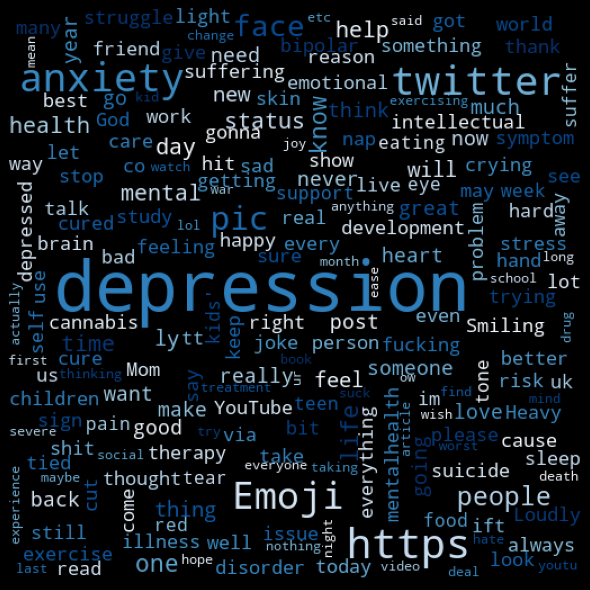

In [7]:
#questions
depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


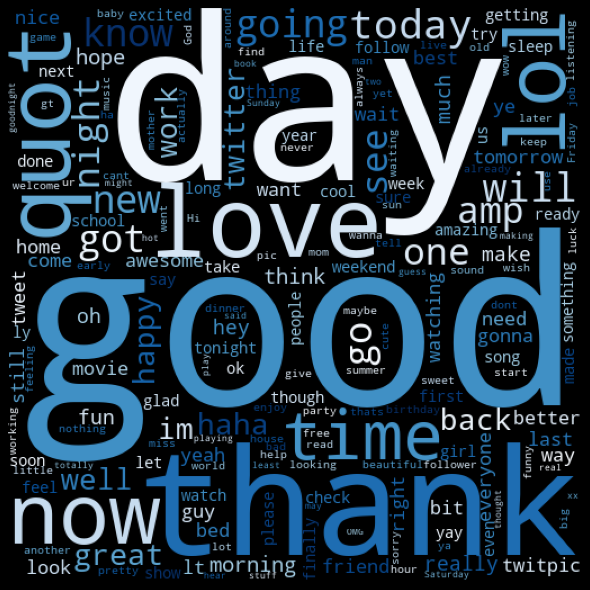

In [8]:
#answers
positive_words = ' '.join(list(tweets[tweets['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()
